# Name: Mahathi Veluri - Exploratory Data Analysis Retail.

In [29]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Read the file
file = os.path.join("Resources","SampleSuperstore.csv")
file

'Resources\\SampleSuperstore.csv'

In [31]:
#store the file to dataframe
retail_data = pd.read_csv(file)
retail_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [32]:
# Filling values with '0's
retaildata = retail_data.fillna(0)
retaildata.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


No handles with labels found to put in legend.


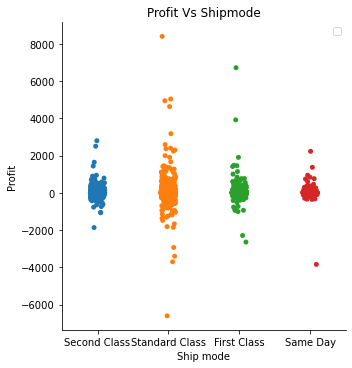

In [192]:
# Shipmode VS Profit

sns.catplot(x="Ship Mode",y="Profit",data=retaildata)
plt.xlabel("Ship mode")



plt.title('Profit Vs Shipmode')
plt.savefig('Images/shipmode.png')

No handles with labels found to put in legend.


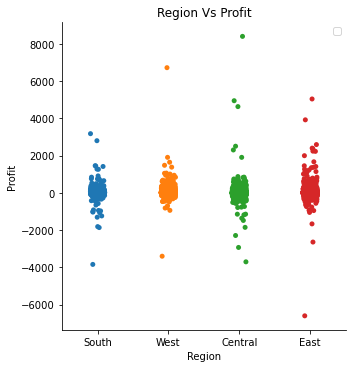

In [193]:
# Region VS Profit

sns.catplot(x="Region",y="Profit",data=retaildata)
plt.xlabel("Region")

plt.title('Region Vs Profit')
plt.savefig('Images/region.png')

In [35]:
# Segment VS Profit
seg_pro=retaildata[['Segment','Profit']]
seg_pro_grp = seg_pro.groupby('Segment').sum()
seg_pro_rst = seg_pro_grp.reset_index()
seg_pro_rst

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


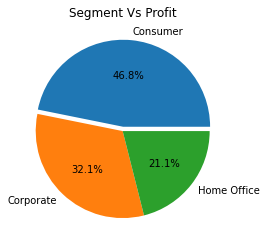

In [202]:
plt.pie(seg_pro_rst['Profit'],labels=seg_pro_rst['Segment'],autopct='%1.1f%%',explode=(0.05,0,0))
plt.title('Segment Vs Profit')
plt.savefig('Images/segment.png')
#plt.legend(loc="left")

In [196]:
cat = retaildata.groupby(['Category','Sub-Category']).Profit.sum()
cat_df = pd.DataFrame(cat)
#c=cat_df.reset_index()
cat_df

Profit
Category        Sub-Category            
Furniture       Bookcases     -3472.5560
                Chairs        26590.1663
                Furnishings   13059.1436
                Tables       -17725.4811
Office Supplies Appliances    18138.0054
                Art            6527.7870
                Binders       30221.7633
                Envelopes      6964.1767
                Fasteners       949.5182
                Labels         5546.2540
                Paper         34053.5693
                Storage       21278.8264
                Supplies      -1189.0995
Technology      Accessories   41936.6357
                Copiers       55617.8249
                Machines       3384.7569
                Phones        44515.7306

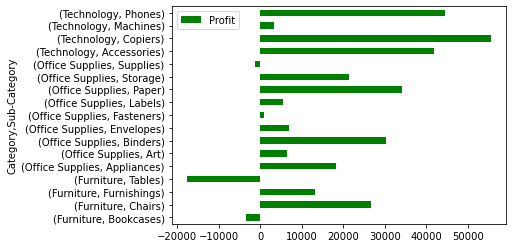

In [160]:
cat_df.plot.barh(color=np.where(cat_df['Profit']>0,'y','g'))

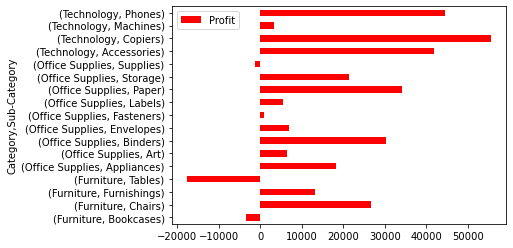

In [157]:
cat_df.plot.barh(color = cat_df['colors'])

In [149]:
cat_df['colors'] = ''

In [150]:
colors = []
for x in cat_df.Profit:
    #print(x)
    if x < 0:
        cat_df['colors'] = 'red'
        colors.append('red')
    else:
        #print('hi')
        cat_df['colors'] = 'green'
        colors.append('green')

In [154]:
cat_df['colors'] = colors
cat_df

Profit colors
Category        Sub-Category                   
Furniture       Bookcases     -3472.5560    red
                Chairs        26590.1663  green
                Furnishings   13059.1436  green
                Tables       -17725.4811    red
Office Supplies Appliances    18138.0054  green
                Art            6527.7870  green
                Binders       30221.7633  green
                Envelopes      6964.1767  green
                Fasteners       949.5182  green
                Labels         5546.2540  green
                Paper         34053.5693  green
                Storage       21278.8264  green
                Supplies      -1189.0995    red
Technology      Accessories   41936.6357  green
                Copiers       55617.8249  green
                Machines       3384.7569  green
                Phones        44515.7306  green

In [155]:
#colors

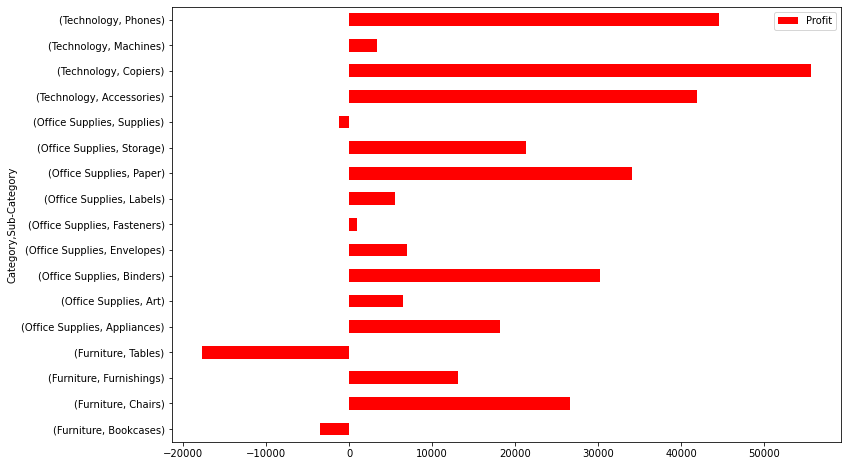

In [158]:
cat_df.plot(kind="barh",figsize=(12,8),color=cat_df['colors'])

In [84]:
def bar_color(cat_df,color1,color2):
    return np.where(cat_df.Profit>0,color1,color2).T

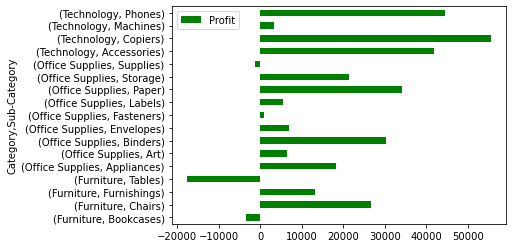

In [85]:
cat_df.plot.barh(color=bar_color(cat_df,'r','g'))

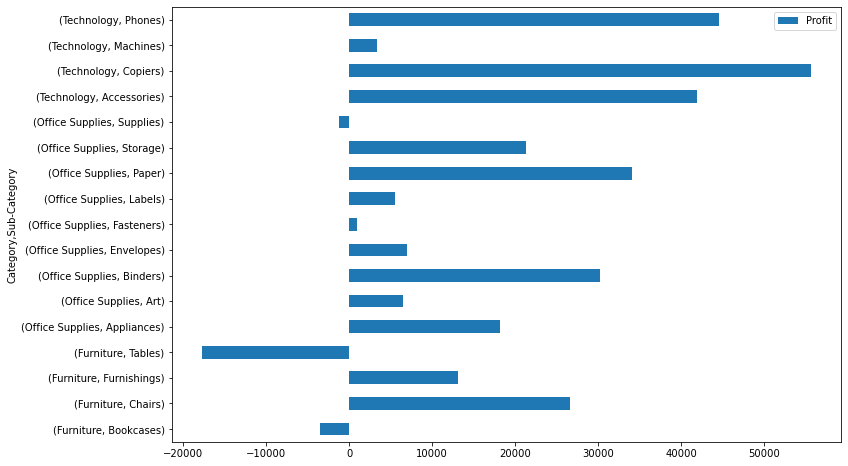

In [78]:
cat_df.plot(kind="barh",figsize=(12,8))

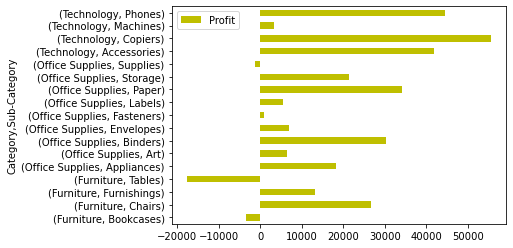

In [116]:
color=(cat_df.Profit>0).apply(lambda x:'r' if x else 'y')
splot = cat_df.plot.barh(color=color)

In [64]:
# list((cat_df['Profit']>0).map({True:'red',False:'green'}))
#cat_df.plot(kind="barh",figsize=(12,8),colormap=(cat_df['Profit']>0).map({True:'red',False:'green'}))
#COLOR_BOOL = {True:'red',False:'green'}
#cat_df.plot(kind="barh",figsize=(12,8),colormap=map(lambda x: COLOR_BOOL[x['Profit']>0]))

In [43]:
state = retaildata.groupby(['State']).Profit.sum()
state_df = pd.DataFrame(state)
len(state_df)

49

In [12]:
maxi = state_df['Profit'].max()
mini = state_df['Profit'].min()

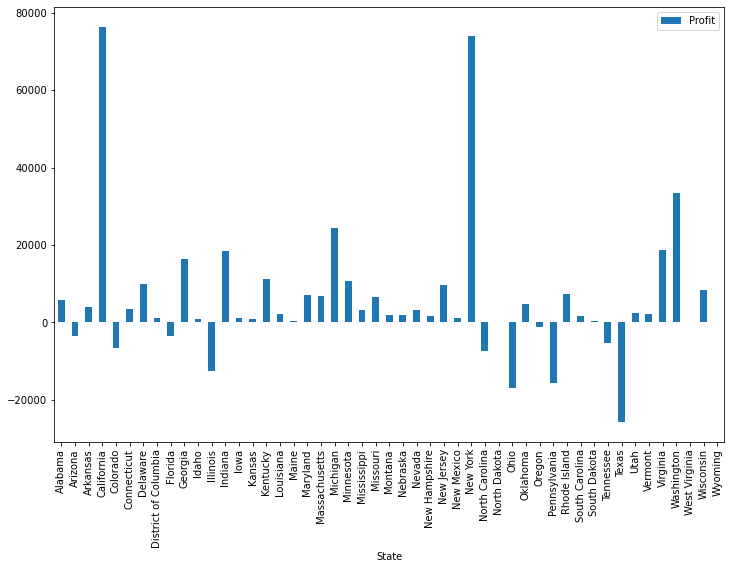

In [13]:
state_df.plot(kind="bar", figsize=(12,8)) 
#plt.ylim(mini,maxi)

#plt.tick_params(axis='x', which='major', labelsize= 10)

In [14]:
city = retaildata[["City","Postal Code","Profit"]]
city

,City,Postal Code,Profit
0,Henderson,42420,41.9136
1,Henderson,42420,219.5820
2,Los Angeles,90036,6.8714
3,Fort Lauderdale,33311,-383.0310
4,Fort Lauderdale,33311,2.5164
...,...,...,...
9989,Miami,33180,4.1028
9990,Costa Mesa,92627,15.6332
9991,Costa Mesa,92627,19.3932
9992,Costa Mesa,92627,13.3200


In [15]:
city = city.groupby(['City','Postal Code']).Profit.sum()
city_df = pd.DataFrame(city)

In [16]:
city_df

,,Profit
City,Postal Code,
Aberdeen,57401,6.6300
Abilene,79605,-3.7584
Akron,44312,-186.6356
Albuquerque,87105,634.0881
Alexandria,22304,318.6183
...,...,...
Woonsocket,2895,78.6791
Yonkers,10701,2767.7557
York,17403,-102.1692


In [17]:
city_reset = city_df.reset_index()
city_reset['city_postal'] = ''

In [18]:
for i in range(len(city_reset)):
    city_reset['city_postal'][i] = city_reset['City'][i] + "," + str(city_reset['Postal Code'][i])

<ipython-input-18-e60093432416>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_reset['city_postal'][i] = city_reset['City'][i] + "," + str(city_reset['Postal Code'][i])


In [19]:
cities_top_15 = city_reset.sort_values(by='Profit',ascending=False)
top_15 = cities_top_15.head(15)
top_15

,City,Postal Code,Profit,city_postal
398,New York City,10024,21653.7248,"New York City,10024"
399,New York City,10035,16533.8669,"New York City,10035"
396,New York City,10009,13697.0019,"New York City,10009"
545,Seattle,98115,13303.8755,"Seattle,98115"
397,New York City,10011,10152.3901,"New York City,10011"
280,Lafayette,47905,8976.0973,"Lafayette,47905"
544,Seattle,98105,8734.6042,"Seattle,98105"
400,Newark,19711,8086.1715,"Newark,19711"
147,Detroit,48205,7994.5263,"Detroit,48205"
326,Los Angeles,90049,7793.1145,"Los Angeles,90049"


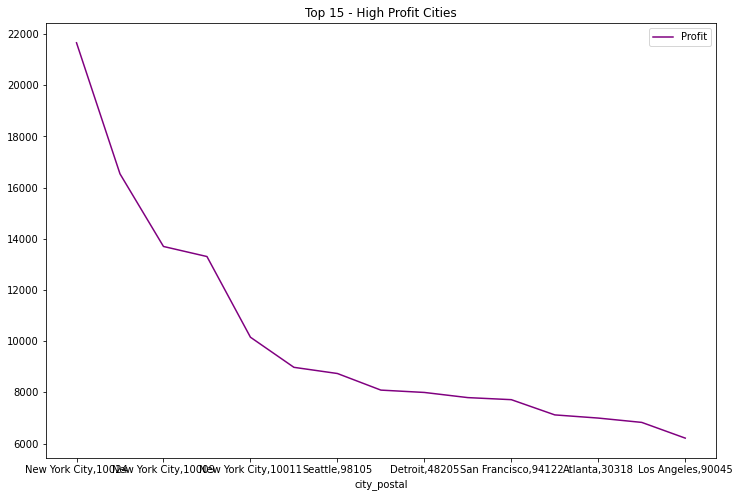

In [190]:
top_15.plot(x='city_postal',y='Profit',kind='line',color='purple',figsize=(12,8))
#plt.tick_params(axis='x', which='major', labelsize= 10)
#plt.xticks(rotation=90)
plt.legend()
plt.title('Top 15 - High Profit Cities')
plt.savefig('Images/top_15.png')

In [21]:
cities_btm_15 = city_reset.sort_values(by='Profit')
btm_15 = cities_btm_15.head(15)
btm_15

,City,Postal Code,Profit,city_postal
521,San Antonio,78207,-7299.0502,"San Antonio,78207"
292,Lancaster,43130,-7149.6180,"Lancaster,43130"
69,Burlington,27217,-5894.5269,"Burlington,27217"
92,Chicago,60653,-5678.7982,"Chicago,60653"
451,Philadelphia,19140,-5168.3905,"Philadelphia,19140"
248,Houston,77095,-4447.3323,"Houston,77095"
452,Philadelphia,19143,-3830.7458,"Philadelphia,19143"
450,Philadelphia,19134,-3745.8552,"Philadelphia,19134"
328,Louisville,80027,-3406.2095,"Louisville,80027"
453,Phoenix,85023,-2790.8832,"Phoenix,85023"


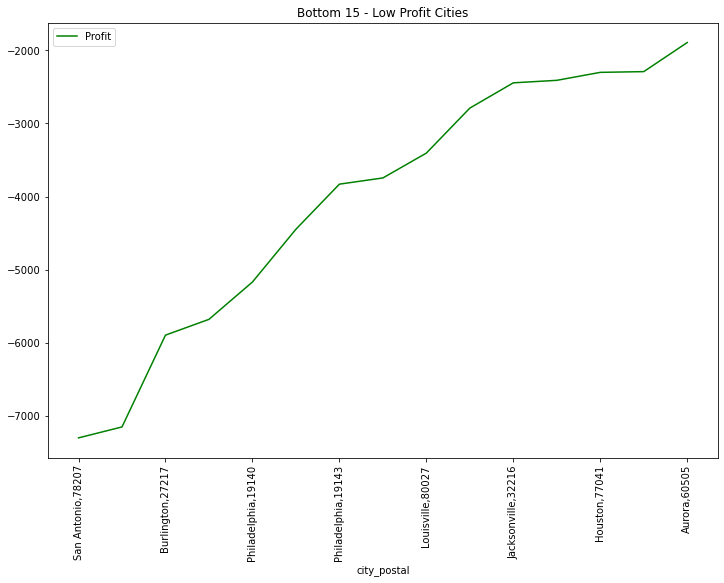

In [177]:
btm_15.plot(x='city_postal',y='Profit',kind="line",color="green",figsize=(12,8))
plt.xticks(rotation=90)
plt.legend()
plt.title('Bottom 15 - Low Profit Cities')
plt.savefig('Images/Bottom_15.png')

In [173]:
sales_profit = retaildata[['State','Sales','Profit']]
#sales_profit

In [24]:
state_sales_profit = sales_profit.groupby('State').sum()

In [25]:
state_sales_profit_df = state_sales_profit.reset_index()
state_sales_profit_df.head()

,State,Sales,Profit
0,Alabama,19510.6400,5786.8253
1,Arizona,35282.0010,-3427.9246
2,Arkansas,11678.1300,4008.6871
3,California,457687.6315,76381.3871
4,Colorado,32108.1180,-6527.8579


No handles with labels found to put in legend.


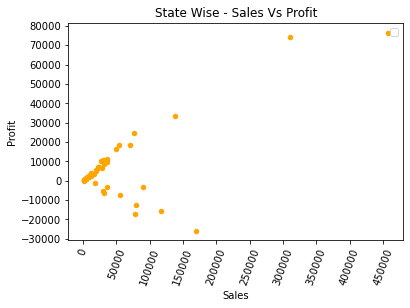

In [176]:
state_sales_profit_df.plot(x="Sales",y="Profit",kind="scatter",color="orange")

#x1=state_sales_profit_df['Profit'].min()
y1=state_sales_profit_df['Profit'].max()
plt.yticks(np.arange(-30000,y1+10000,10000))

#x2=state_sales_profit_df['Sales'].min()
y2=state_sales_profit_df['Sales'].max()
plt.xticks(np.arange(0,y2,50000),rotation=70)

plt.title("State Wise - Sales Vs Profit")
plt.savefig('Images/state_wise_sales_profit.png')